<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_ml/ml01_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신 러닝의 일반적인 과정
* 문제 정의/파악, 큰 그림 파악
* 데이터 수집
* 데이터 탐색 - 시각화
* 데이터 준비/전처리 - NA 처리, 이상치 처리, 파생 변수, 특성 제외, 숫자형/카테고리형 데이터 변환, ...
* 머신 러닝 알고리즘 선택, 훈련(학습)
* 알고리즘 세부 튜닝 - 하이퍼 파라미터(hyper-parameter) 조정
* 시스템(애플리케이션) 상용화

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
file_path = 'https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true'

In [125]:
housing_df = pd.read_csv(file_path)

In [126]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
len(housing_df)  #> row의 개수(sample/example/instance의 개수)

20640

In [6]:
housing_df.shape

(20640, 10)

In [7]:
# 변수(컬럼, 특성)들의 데이터 타입
housing_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
# 숫자형 데이터 요약
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
# 카테고리형 데이터 요약
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

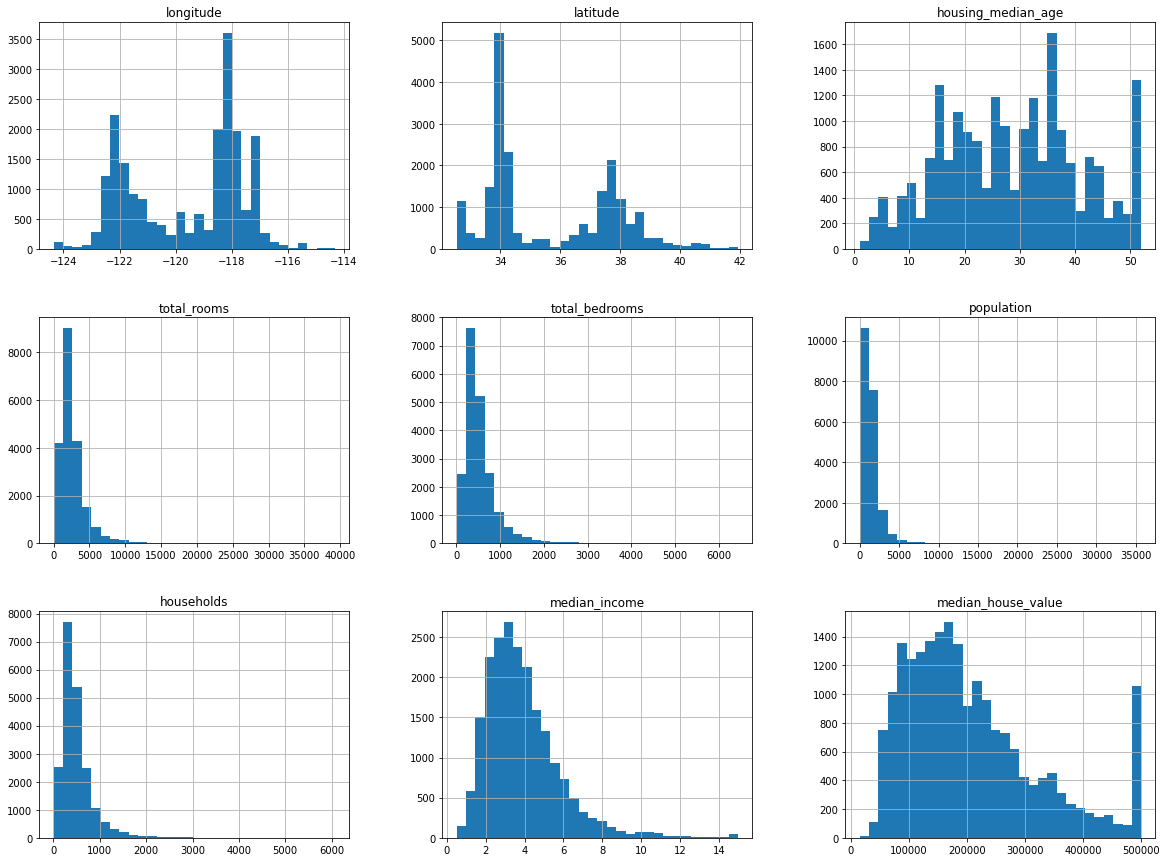

In [10]:
# 숫자형(연속형) 변수의 분포 - 히스토그램(histogram)
housing_df.hist(bins=30, figsize=(20, 15))
plt.show()

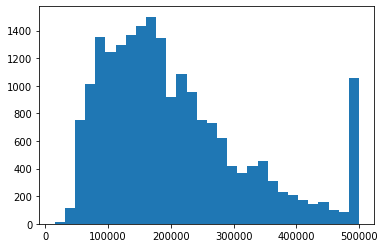

In [11]:
plt.hist(x=housing_df['median_house_value'], bins=30)
plt.show()

Scikit-Learn 패키지의 기능들

In [12]:
from sklearn.model_selection import train_test_split
# sklearn 패키지(폴더)의 model_selection 모듈(파일)에서 train_test_split 함수를 임포트.

In [13]:
train, test = train_test_split(housing_df,  # pandas.DataFrame, numpy.ndarray
                               test_size=0.2,   # 테스트 셋의 크기(float=비율, int=개수)
                               random_state=1)  # 난수 발생 seed

In [14]:
len(train), len(test)

(16512, 4128)

In [15]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15961,-122.43,37.71,52.0,1410.0,286.0,879.0,282.0,3.1908,255600.0,NEAR BAY
1771,-122.35,37.95,42.0,1485.0,290.0,971.0,303.0,3.6094,114600.0,NEAR BAY
16414,-121.24,37.90,16.0,50.0,10.0,20.0,6.0,2.6250,137500.0,INLAND
5056,-118.35,34.02,34.0,5218.0,1576.0,3538.0,1371.0,1.5143,118800.0,<1H OCEAN
8589,-118.39,33.89,38.0,1851.0,332.0,750.0,314.0,7.3356,422700.0,<1H OCEAN


In [16]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN


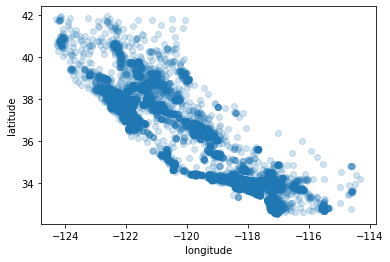

In [17]:
# longitude, latitude 시각화
plt.plot(train['longitude'], train['latitude'], 
         linestyle='', marker='o', alpha=0.2)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

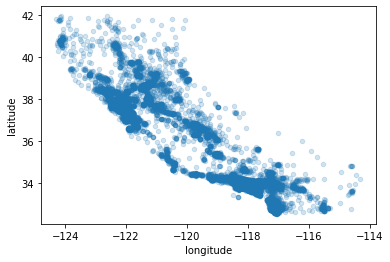

In [18]:
train.plot(x='longitude', y='latitude', kind='scatter', alpha=0.2)
plt.show()

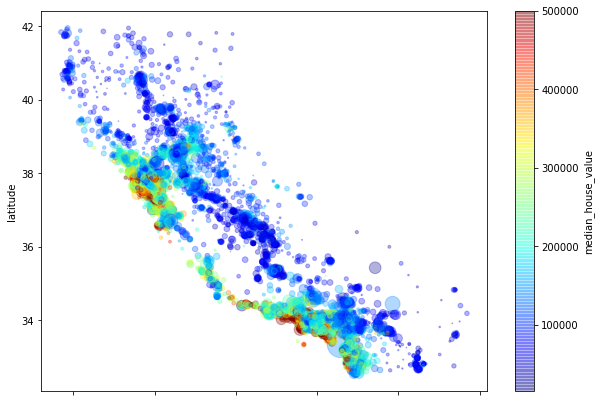

In [19]:
# longitude(x축), latitude(y축), population(점의 크기), median_house_value(점의 색깔)
train.plot(x='longitude', y='latitude', kind='scatter', alpha=0.3,
                figsize=(10, 7),
                s=train['population']/50,  # s(ize)
                c='median_house_value',  # c(olor)
                cmap='jet')  # cmap(color map)
plt.show()

In [20]:
# 변수들간의 상관 관계(correlation) - 피어스 상관 계수(-1 ~ 1)
corr_mat = train.corr()
corr_mat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925246,-0.106156,0.037578,0.065412,0.095861,0.049854,-0.018227,-0.050893
latitude,-0.925246,1.000000,0.009373,-0.029916,-0.063107,-0.105325,-0.066939,-0.076734,-0.139374
housing_median_age,-0.106156,0.009373,1.000000,-0.361784,-0.319623,-0.296996,-0.301496,-0.123550,0.105758
total_rooms,0.037578,-0.029916,-0.361784,1.000000,0.929219,0.854458,0.916737,0.201318,0.135514
total_bedrooms,0.065412,-0.063107,-0.319623,0.929219,1.000000,0.875187,0.979268,-0.006820,0.050560
population,0.095861,-0.105325,-0.296996,0.854458,0.875187,1.000000,0.905040,0.007521,-0.023884
households,0.049854,-0.066939,-0.301496,0.916737,0.979268,0.905040,1.000000,0.013801,0.066801
median_income,-0.018227,-0.076734,-0.123550,0.201318,-0.006820,0.007521,0.013801,1.000000,0.688194
median_house_value,-0.050893,-0.139374,0.105758,0.135514,0.050560,-0.023884,0.066801,0.688194,1.000000


In [21]:
# median_house_value와 다른 변수(특성)들 간의 상관 계수
corr_mat['median_house_value']

longitude            -0.050893
latitude             -0.139374
housing_median_age    0.105758
total_rooms           0.135514
total_bedrooms        0.050560
population           -0.023884
households            0.066801
median_income         0.688194
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [22]:
corr_mat['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688194
total_rooms           0.135514
housing_median_age    0.105758
households            0.066801
total_bedrooms        0.050560
population           -0.023884
longitude            -0.050893
latitude             -0.139374
Name: median_house_value, dtype: float64

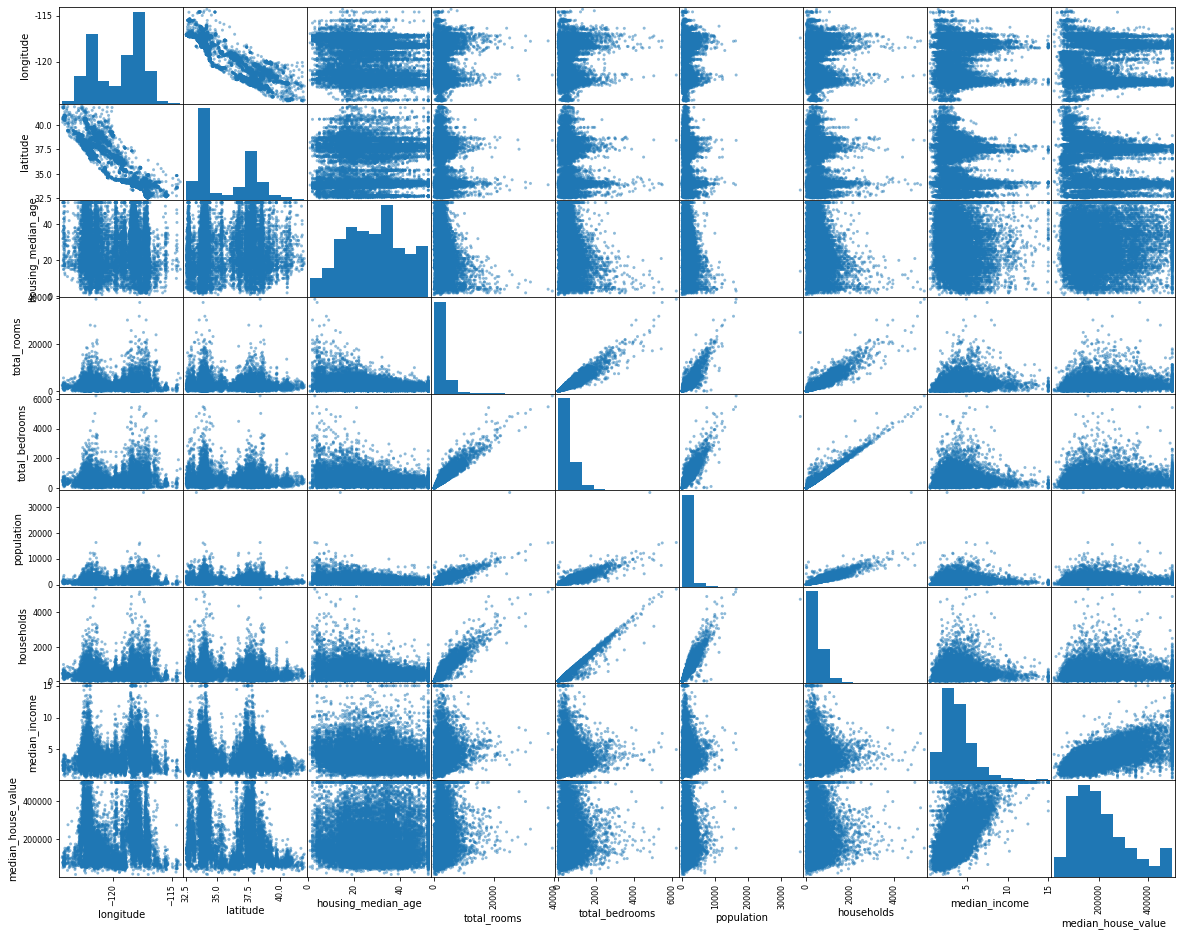

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(train, figsize=(20, 16))
plt.show()

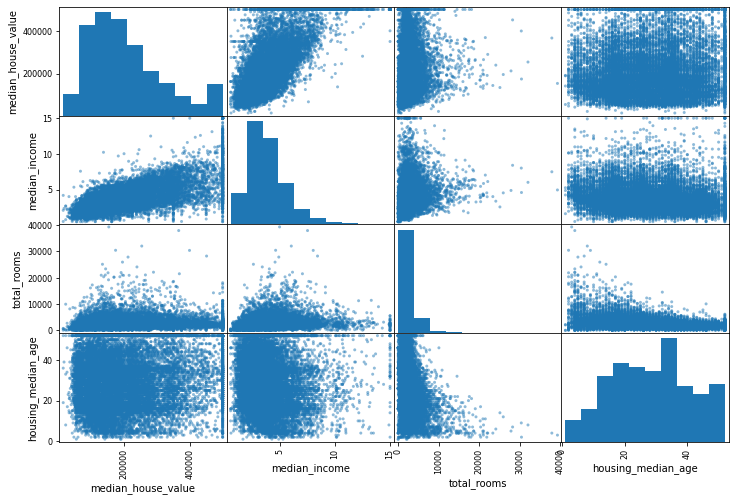

In [24]:
# 변수(컬럼)들이 많은 경우에는 몇개의 변수들만 선택해서 scatter matrix를 그려보는 게 좋음.
vars = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(train[vars], figsize=(12, 8))
plt.show()

In [127]:
# median_income 변수가 median_house_value와 높은 상관 관계를 갖는다.
# -> 훈련 셋과 테스트 셋을 나눌 때, median_income의 분포가 유지될 수 있도록 나누는 게 좋지 않을까
# -> 계층적 분리(샘플링): StratifiedShuffleSplit 클래스 이용
# -> 계층적 분리를 하려면 카테고리 변수를 사용.

# median_income을 구간으로 나눈 카테고리 변수를 추가
housing_df['income_cat'] = pd.cut(x=housing_df['median_income'],
                                  bins=[0, 1.5, 3, 4.5, 6, np.inf],
                                  labels=[1, 2, 3, 4, 5])

In [128]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [27]:
housing_df['income_cat'].value_counts().sort_index()

1     822
2    6581
3    7236
4    3639
5    2362
Name: income_cat, dtype: int64

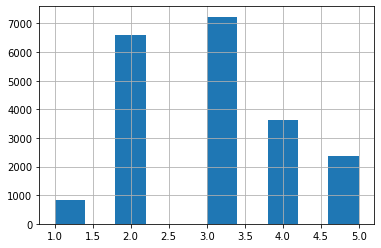

In [28]:
housing_df['income_cat'].hist()

In [29]:
housing_df['income_cat'].value_counts().sort_index() / len(housing_df)

1    0.039826
2    0.318847
3    0.350581
4    0.176308
5    0.114438
Name: income_cat, dtype: float64

In [129]:
from sklearn.model_selection import StratifiedShuffleSplit

In [130]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

In [131]:
for train_indices, test_indices in split.split(X=housing_df, y=housing_df['income_cat']):
    # print(train_indices, len(train_indices))
    # print(test_indices, len(test_indices))
    strat_train_set = housing_df.loc[train_indices]
    strat_test_set = housing_df.loc[test_indices]

In [33]:
strat_train_set['income_cat'].value_counts().sort_index() / len(strat_train_set)

1    0.039850
2    0.318859
3    0.350594
4    0.176296
5    0.114402
Name: income_cat, dtype: float64

In [34]:
strat_test_set['income_cat'].value_counts().sort_index() / len(strat_test_set)

1    0.039729
2    0.318798
3    0.350533
4    0.176357
5    0.114583
Name: income_cat, dtype: float64

In [132]:
# income_cat 변수는 median_income을 카테고리화해서 train/test split을 하기 위해 임시로 사용했던 변수.
# ML 알고리즘에서는 income_cat 변수를 사용하지 않는 게 좋음.
strat_train_set.drop(labels='income_cat', 
                     axis=1,  # axis=0: row 삭제(기본값), axis=1: column 삭제
                     inplace=True)  # inplace=False: 원본 DF 유지. 새로운 DF를 리턴.(기본값)
                                    # inplace=True: 원본 DF를 변경.

In [36]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
740,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
19529,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
8613,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
10142,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
15867,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


In [133]:
strat_test_set.drop(labels='income_cat', axis=1, inplace=True)

In [38]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
462,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,216700.0,NEAR BAY
20384,-118.94,34.18,24.0,3689.0,585.0,1898.0,581.0,5.9224,239400.0,<1H OCEAN
2140,-119.75,36.77,32.0,1962.0,399.0,1005.0,392.0,2.6726,70400.0,INLAND
8419,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,155700.0,<1H OCEAN
2932,-119.00,35.36,35.0,1021.0,280.0,1258.0,239.0,1.7375,48600.0,INLAND


In [39]:
# 데이터 전처리 - NA 처리. outlier 처리. 파생 변수. 카테고리 변수 처리. ...
# NA 처리: 1) NA 포함된 변수(컬럼)를 제외. 2) NA가 포함된 row를 제외. 3) NA를 다른 값으로 대체.
# NA를 중앙값 등으로 대체: 훈련 셋의 중앙값을 찾아서, 그 값으로 훈련 셋, 테스트 셋의 NA를 모두 대체.
train_median = strat_train_set['total_bedrooms'].median()
train_median

434.0

In [40]:
strat_train_set['total_bedrooms'].fillna(train_median)

740       318.0
19529      63.0
8613      331.0
10142     226.0
15867     385.0
          ...  
11207     301.0
9035     1251.0
10482    1011.0
13596      11.0
1318      780.0
Name: total_bedrooms, Length: 16512, dtype: float64

훈련 셋을 전처리할 때 했던 과정들은 테스트 셋을 전처리할 때에도 동일하게 적용되어야 함 -> Scikit-Learn의 변환기 클래스들을 이용하면 편리함.

In [134]:
# NA값 대체 - SimpleImputer 클래스를 사용
from sklearn.impute import SimpleImputer

In [42]:
# imputer 객체 생성
imputer = SimpleImputer(strategy='median')
imputer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [43]:
# imputer 객체를 훈련 셋에 fitting시킴 - 훈련 셋의 NA들을 대체할 수 있는 중앙값을 찾는 과정.
# imputer.fit(strat_train_set)
#> imputer 객체 각 변수(컬럼)의 중앙값을 찾는 과정(fitting)에서 숫자형이 아닌 컬럼이 있어서 에러 발생.

In [44]:
housing_df.shape  # CSV 파일에 생성한 전체 DF + income_cat 컬럼

(20640, 11)

In [45]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [46]:
strat_train_set.shape  # 훈련 셋(80%)

(16512, 10)

In [47]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
740,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
19529,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
8613,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
10142,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
15867,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


In [48]:
strat_test_set.shape  # 테스트 셋(20%)

(4128, 10)

In [49]:
# 훈련 셋에서 예측 변수(독립 변수)와 레이블(종속 변수)을 분리
housing = strat_train_set.drop(labels='median_house_value', axis=1)  # 예측 변수들
housing_labels = strat_train_set['median_house_value'].copy()  # 레이블(종속 변수)

In [50]:
housing.shape, housing_labels.shape

((16512, 9), (16512,))

In [51]:
# 예측 변수들의 훈련 셋 housing에서 숫자형 컬럼들만 선택 -> 중앙값 찾을 수 있음.
housing_numeric = housing.drop(labels='ocean_proximity', axis=1)
housing_numeric.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
740,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676
19529,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841
8613,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755
10142,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980
15867,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312


In [52]:
imputer.fit(X=housing_numeric)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [53]:
imputer.statistics_  # fitting 이후에 imputer에 새로 생긴 속성(attribute) - 각 변수의 중앙값

array([-118.49   ,   34.26   ,   29.     , 2122.5    ,  434.     ,
       1163.     ,  409.     ,    3.52945])

In [54]:
housing_numeric.median()

longitude             -118.49000
latitude                34.26000
housing_median_age      29.00000
total_rooms           2122.50000
total_bedrooms         434.00000
population            1163.00000
households             409.00000
median_income            3.52945
dtype: float64

In [55]:
housing_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 740 to 1318
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [56]:
X_transformed = imputer.transform(X=housing_numeric)  # transform: NA를 대체 
X_transformed  #> numpy.ndarray가 리턴! pandas.DataFrame이 아님!

array([[-1.2213e+02,  3.7670e+01,  4.0000e+01, ...,  9.1400e+02,
         3.1700e+02,  3.8676e+00],
       [-1.2098e+02,  3.7650e+01,  4.0000e+01, ...,  1.5800e+02,
         6.3000e+01,  7.3841e+00],
       [-1.1837e+02,  3.3870e+01,  2.3000e+01, ...,  8.9100e+02,
         3.5600e+02,  6.5755e+00],
       ...,
       [-1.1769e+02,  3.3580e+01,  5.0000e+00, ...,  2.8770e+03,
         9.8200e+02,  7.5177e+00],
       [-1.1730e+02,  3.4100e+01,  4.9000e+01, ...,  7.6000e+01,
         1.3000e+01,  2.5625e+00],
       [-1.2177e+02,  3.7990e+01,  4.0000e+00, ...,  2.4290e+03,
         7.1600e+02,  5.4409e+00]])

In [57]:
X_transformed = pd.DataFrame(data=X_transformed,
                             index=housing_numeric.index,
                             columns=housing_numeric.columns)
X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 740 to 1318
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [58]:
housing_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 740 to 1318
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [59]:
# SimpleImputer 생성 -> fit() 메서드 호출 -> transform() 메서드 호출
# SimpleImputer와 같은 대부분의 변환기 클래스는 fit 호출 후 transform까지 자동으로 호출하는
# fit_transform 메서드를 가지고 있음.
imputer2 = SimpleImputer()
X_transformed = imputer2.fit_transform(housing_numeric)
X_transformed = pd.DataFrame(data=X_transformed, 
                             index=housing_numeric.index,
                             columns=housing_numeric.columns)
X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 740 to 1318
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


대부분의 머신 러닝 알고리즘은 데이터들이 숫자형이어야만 동작하는 경우들이 많음.
* 문자열 타입인 카테고리('near ocean', 'near bay', ...)를 숫자형(0, 1, 2, ...)으로 변환 - OrdianlEncoder
* 문자열 타입 카테고리를 One-Hot 벡터로 변환 - OneHotEncoder

In [60]:
housing_category = housing[['ocean_proximity']]
housing_category.head()

,ocean_proximity
740,NEAR BAY
19529,INLAND
8613,<1H OCEAN
10142,<1H OCEAN
15867,NEAR BAY


In [61]:
housing_category.tail()

,ocean_proximity
11207,<1H OCEAN
9035,INLAND
10482,<1H OCEAN
13596,INLAND
1318,INLAND


In [135]:
# 카테고리 변수를 문자열에서 숫자로 변환
from sklearn.preprocessing import OrdinalEncoder

In [63]:
# OrdinalEncoder 객체 생성
ord_enc = OrdinalEncoder()

In [64]:
# 훈련 셋에 fitting -> 훈련 셋을 transform
housing_category_encoded = ord_enc.fit_transform(X=housing_category)
housing_category_encoded[:5]

array([[3.],
       [1.],
       [0.],
       [0.],
       [3.]])

In [65]:
housing_category_encoded[-5:]

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.]])

In [66]:
ord_enc.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [136]:
# 카테고리 변수를 One-Hot vector로 변환.
from sklearn.preprocessing import OneHotEncoder

In [68]:
# OneHotEncoder 객체 생성
one_hot_enc = OneHotEncoder()

In [69]:
# 변환기를 훈련 셋에 fit -> 훈련 셋을 transform
housing_category_1hot = one_hot_enc.fit_transform(X=housing_category)
housing_category_1hot  # sparse matrix(희소 행렬)

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [70]:
housing_category_1hot.toarray()  # 희소 행렬의 내용을 2차원 배열 형태로 출력.

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

파생 변수 추가

In [71]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

* 가구당 방의 개수: total_rooms / households
* 가구당 인구수: population / households
* 침실 vs 방의 비율: total_bedrooms / total_rooms

In [137]:
total_rooms_idx = 3
total_bedrooms_idx = 4
population_idx = 5
households_idx = 6
# pandas.DataFrame은 row와 column들이 label을 가질 수 있지만,
# numpy.ndarray는 label이 없고, index만 가질 수 있음!

In [138]:
# BaseEstimator, TransformerMixin 클래스를 상속받는 클래스를 정의
from sklearn.base import BaseEstimator, TransformerMixin
# BaseEstimator 클래스: scikit-learn 패키지의 모든 추정기(estimator)들의 부모 클래스
# TransformerMixin 클래스: scikit-learn 패키지의 모든 변환기(transformer)들의 부모 클래스

In [139]:
class CombineAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        # 침실 vs 방의 비율 파생 변수를 추가할 것인지 말 것인지를 결정.
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        # 할 일이 없음.
        # TransformerMixin.fit_transform 메서드는 fit 메서드가 리턴하는 객체에서 
        # transform 메서드를 호출하기 때문에 return self를 추가!
        return self  
        
    def transform(self, X):
        """X: 2차원 numpy.ndarray.
        파생 변수들이 추가된 ndarray를 반환(return)"""
        # 가구당 방 개수
        rooms_per_household = X[:, total_rooms_idx] / X[:, households_idx]
        # 가구당 인구수
        pop_per_household = X[:, population_idx] / X[:, households_idx]
        # X에 컬럼을 추가(concatenate)
        result = np.c_[X, rooms_per_household, pop_per_household]
        # 침실vs방의 비율을 추가하도록 설정된 경우
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, total_bedrooms_idx] / X[:, total_rooms_idx]
            result = np.c_[result, bedrooms_per_room]
        
        return result


In [75]:
adder = CombineAttributeAdder()

In [76]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
740,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,NEAR BAY
19529,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,INLAND
8613,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,<1H OCEAN
10142,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,<1H OCEAN
15867,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,NEAR BAY


In [77]:
housing.values

array([[-122.13, 37.67, 40.0, ..., 317.0, 3.8676, 'NEAR BAY'],
       [-120.98, 37.65, 40.0, ..., 63.0, 7.3841, 'INLAND'],
       [-118.37, 33.87, 23.0, ..., 356.0, 6.5755, '<1H OCEAN'],
       ...,
       [-117.69, 33.58, 5.0, ..., 982.0, 7.5177, '<1H OCEAN'],
       [-117.3, 34.1, 49.0, ..., 13.0, 2.5625, 'INLAND'],
       [-121.77, 37.99, 4.0, ..., 716.0, 5.4409, 'INLAND']], dtype=object)

In [78]:
housing.values.shape

(16512, 9)

In [79]:
X_transformed = adder.fit_transform(X=housing.values)
X_transformed.shape

(16512, 12)

In [80]:
X_transformed[:3, ]

array([[-122.13, 37.67, 40.0, 1748.0, 318.0, 914.0, 317.0, 3.8676,
        'NEAR BAY', 5.514195583596215, 2.8832807570977916,
        0.18192219679633867],
       [-120.98, 37.65, 40.0, 422.0, 63.0, 158.0, 63.0, 7.3841, 'INLAND',
        6.698412698412699, 2.507936507936508, 0.14928909952606634],
       [-118.37, 33.87, 23.0, 1829.0, 331.0, 891.0, 356.0, 6.5755,
        '<1H OCEAN', 5.137640449438202, 2.502808988764045,
        0.18097320940404593]], dtype=object)

In [81]:
adder = CombineAttributeAdder(add_bedrooms_per_room=False)
X_transformed = adder.fit_transform(X=housing.values)
X_transformed.shape

(16512, 11)

특성 스케일 변환
* 표준화(standardization): 변수의 평균을 0, 표준편차를 1로 만들어주는 변환. StandardScaler
* 정규화(normalization): 최솟값을 0으로, 최댓값을 1로 만들어주는 변환. MinMaxScaler

In [140]:
from sklearn.preprocessing import StandardScaler

In [83]:
std_scaler = StandardScaler()  # 객체 생성

In [84]:
# fit -> transform
X_transformed = std_scaler.fit_transform(X=housing_numeric)
X_transformed

array([[-1.27826235e+00,  9.54452043e-01,  8.96464280e-01, ...,
        -4.53766853e-01, -4.76899446e-01, -1.82377323e-03],
       [-7.04320194e-01,  9.45093431e-01,  8.96464280e-01, ...,
        -1.12492007e+00, -1.13941217e+00,  1.83933698e+00],
       [ 5.98278964e-01, -8.23684256e-01, -4.53940127e-01, ...,
        -4.74185535e-01, -3.75175051e-01,  1.41597210e+00],
       ...,
       [ 9.37653457e-01, -9.59384131e-01, -1.88378009e+00, ...,
         1.28892331e+00,  1.25763190e+00,  1.90928695e+00],
       [ 1.13229471e+00, -7.16060217e-01,  1.61138426e+00, ...,
        -1.19771711e+00, -1.26982806e+00, -6.85144943e-01],
       [-1.09859350e+00,  1.10418984e+00, -1.96321564e+00, ...,
         8.91202889e-01,  5.63819362e-01,  8.21920918e-01]])

In [85]:
# 변환된 배열의 각 컬럼의 평균과 표준편차를 확인
# nanmean: na를 제외하고 평균을 계산
np.nanmean(X_transformed, axis=0)

array([-6.65811076e-16, -1.82412225e-15,  6.17507768e-17, -3.37800416e-17,
       -8.12424582e-17,  1.51149549e-17, -1.18337725e-17, -2.14836762e-16])

In [86]:
# nanstd: na를 제외하고 표준 편차를 계산
np.nanstd(X_transformed, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [141]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
minmax_scaler = MinMaxScaler()  # 객체 생성

In [89]:
# fit -> transform
X_transformed = minmax_scaler.fit_transform(X=housing_numeric)
X_transformed

array([[0.22111554, 0.54516472, 0.76470588, ..., 0.02553323, 0.05898824,
        0.23225197],
       [0.33565737, 0.54303932, 0.76470588, ..., 0.00434429, 0.01157364,
        0.47476587],
       [0.59561753, 0.141339  , 0.43137255, ..., 0.02488859, 0.06626843,
        0.41900112],
       ...,
       [0.66334661, 0.11052072, 0.07843137, ..., 0.08055158, 0.18312488,
        0.48397953],
       [0.70219124, 0.16578108, 0.94117647, ..., 0.00204602, 0.00224006,
        0.14224631],
       [0.25697211, 0.57917109, 0.05882353, ..., 0.06799518, 0.13347023,
        0.34075392]])

In [90]:
# 변환된 2차원 배열의 각 컬럼의 최솟값과 최댓값 확인
np.nanmin(X_transformed, axis=0), np.nanmax(X_transformed, axis=0)

(array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1.]))

연속된 변환(transform) 과정을 순서대로 처리할 수 있도록 연결
* 숫자형 변수들 변환
  * NA 대체
  * 파생 추가
  * 스케일 변환
* 카테고리 변수(들) 변환
  * One-Hot Encoding

In [142]:
# 연속된 변환을 적용할 수 있도록 도와주는 클래스: Pipeline
from sklearn.pipeline import Pipeline

In [143]:
numeric_pipeline = Pipeline(steps=[
                                   ('imputer', SimpleImputer(strategy='median')),
                                   ('attrs_adder', CombineAttributeAdder()),
                                   ('std_scaler', StandardScaler())
                                   ]
                            )

In [146]:
# 컬럼별로 각각 다른 변환기를 적용해 주는 변환기
from sklearn.compose import ColumnTransformer

In [147]:
# 훈련 셋을 숫자형 컬럼과 카테고리 형 컬럼으로 나눠서 각기 다른 변환기를 적용.
# 숫자형 컬럼들의 이름
numeric_attrs = list(housing_numeric.columns)  # Index 객체를 list 객체로 변환.
# 카테고리형 컬럼의 이름
category_attrs = ['ocean_proximity']
numeric_attrs, category_attrs

(['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income'],
 ['ocean_proximity'])

In [148]:
full_pipeline = ColumnTransformer(transformers=[
                                                ('numeric_pipe', numeric_pipeline, numeric_attrs),
                                                ('category_pipe', OneHotEncoder(), category_attrs)
                                                ]
                                  )

In [96]:
housing.shape  #> 훈련 셋: (16512, 9)

(16512, 9)

In [97]:
housing.values

array([[-122.13, 37.67, 40.0, ..., 317.0, 3.8676, 'NEAR BAY'],
       [-120.98, 37.65, 40.0, ..., 63.0, 7.3841, 'INLAND'],
       [-118.37, 33.87, 23.0, ..., 356.0, 6.5755, '<1H OCEAN'],
       ...,
       [-117.69, 33.58, 5.0, ..., 982.0, 7.5177, '<1H OCEAN'],
       [-117.3, 34.1, 49.0, ..., 13.0, 2.5625, 'INLAND'],
       [-121.77, 37.99, 4.0, ..., 716.0, 5.4409, 'INLAND']], dtype=object)

In [149]:
# 훈련 셋 전처리(pre-processing)
housing_prepared = full_pipeline.fit_transform(X=housing)
housing_prepared

array([[-1.27826235,  0.95445204,  0.89646428, ...,  0.        ,
         1.        ,  0.        ],
       [-0.70432019,  0.94509343,  0.89646428, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59827896, -0.82368426, -0.45394013, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.93765346, -0.95938413, -1.88378009, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.13229471, -0.71606022,  1.61138426, ...,  0.        ,
         0.        ,  0.        ],
       [-1.0985935 ,  1.10418984, -1.96321564, ...,  0.        ,
         0.        ,  0.        ]])

In [99]:
housing_prepared.shape  #> 전처리가 끝난 훈련 셋: (16512, 16)  9+3+5-1

(16512, 16)

머신 러닝 알고리즘을 선택하고, 훈련 셋을 학습시킴. 평가.

In [150]:
# Linear Regression(선형 회귀): y ~ x1 + x2 + ... + xn
# y = b0 + b1*x1 + b2*x2 + ... + b3*xn
from sklearn.linear_model import LinearRegression

In [151]:
# 1) 머신 러닝 알고리즘 객체를 생성.
lin_reg = LinearRegression()

In [152]:
# 2) 알고리즘을 훈련 셋으로 학습시킴 - fit(X=레이블 제외된 훈련 셋, y=레이블)
lin_reg.fit(X=housing_prepared, y=housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
# 3) 학습 결과 평가 - 예측값 계산, 실제값과 비교 오차 계산.
housing_predictions = lin_reg.predict(X=housing_prepared)

In [154]:
housing_predictions[:5]  # 예측값 일부

array([234956.84260842, 303073.513104  , 327746.46204573, 355932.30741583,
       210220.50294171])

In [155]:
housing_labels[:5]  # 실제값 일부

740      184000.0
19529    172200.0
8613     359900.0
10142    258200.0
15867    239100.0
Name: median_house_value, dtype: float64

In [156]:
# 회귀(Regression) 평가 지표: 
# 1) mean_squared_error: 오차들의 제곱의 평균 -> RMSE(root mean squared error)
# 2) mean_absolute_error: 오차들의 절대값의 평균(MAE)
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [157]:
linreg_mse = mean_squared_error(y_true=housing_labels,
                                y_pred=housing_predictions)
linreg_mse

4741817047.195885

In [158]:
linreg_rmse = np.sqrt(linreg_mse)
linreg_rmse  #> 평균적으로, 실제 주택 가격 +/- 68860

68860.85279166883

In [159]:
linreg_mae = mean_absolute_error(y_true=housing_labels,
                                 y_pred=housing_predictions)
linreg_mae

49761.26321393414

다른 머신 러닝 알고리즘과 비교

In [160]:
# 의사결정 나무(Decision Tree) 회귀(Regression) 알고리즘
from sklearn.tree import DecisionTreeRegressor

In [161]:
tree_reg = DecisionTreeRegressor()  # 머신 러닝 알고리즘 선택

In [162]:
tree_reg.fit(X=housing_prepared, y=housing_labels)  # 알고리즘 훈련(학습)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [163]:
housing_predictions = tree_reg.predict(X=housing_prepared)  # 예측

In [164]:
housing_predictions[:5]

array([184000., 172200., 359900., 258200., 239100.])

In [165]:
housing_labels[:5]

740      184000.0
19529    172200.0
8613     359900.0
10142    258200.0
15867    239100.0
Name: median_house_value, dtype: float64

In [166]:
tree_reg_rmse = np.sqrt(mean_squared_error(y_true=housing_labels,
                                           y_pred=housing_predictions))
tree_reg_rmse

0.0

In [117]:
# k-fold Cross Validation(교차 검증)
# 훈련 셋을 다시 (작은) 훈련 셋과 검증 셋(Validiation Set)으로 나눈 후, 훈련되지 않은 검증 셋으로 평가.
from sklearn.model_selection import cross_val_score

In [118]:
tree_cv_scores = cross_val_score(estimator=tree_reg,
                                 X=housing_prepared, y=housing_labels,
                                 cv=5,
                                 scoring='neg_mean_squared_error')
tree_cv_scores  # MSE의 음수값

array([-5.24663000e+09, -5.21193438e+09, -5.18760317e+09, -4.67564857e+09,
       -5.15455529e+09])

In [119]:
# RMSE
tree_rmse = np.sqrt(-tree_cv_scores)
tree_rmse.mean()

71365.26331713819

In [120]:
linreg_cv_scores = cross_val_score(estimator=lin_reg,
                                   X=housing_prepared, y=housing_labels,
                                   cv=5,
                                   scoring='neg_mean_squared_error')
linreg_cv_scores

array([-4.73701692e+09, -5.10997706e+09, -4.82901925e+09, -4.41022379e+09,
       -4.92782318e+09])

In [175]:
linreg_rmse = np.sqrt(-linreg_cv_scores)
linreg_rmse.mean(), linreg_rmse.std()

(69281.84207830718, 1684.7553537169777)

In [167]:
# 회귀 알고리즘: SVR(Support Vector Regressor), RandomForestRegressor
# 5-fold CV 수행, RMSE 계산.
from sklearn.ensemble import RandomForestRegressor

In [168]:
# 머신 러닝 모델 생성
forest_reg = RandomForestRegressor()

In [169]:
# 머신 러닝 모델 학습
forest_reg.fit(X=housing_prepared, y=housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [170]:
# 예측, 평가
housing_predictions = forest_reg.predict(X=housing_prepared)
forest_mse = mean_squared_error(y_true=housing_labels, y_pred=housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18659.50329702804

In [171]:
# 훈련 셋을 사용한 교차 검증(Cross Validation) -> 테스트 셋에서의 성능 추정.
forest_cv_scores = cross_val_score(estimator=forest_reg,
                                   X=housing_prepared,
                                   y=housing_labels,
                                   scoring='neg_mean_squared_error',
                                   cv=5)
forest_cv_scores

array([-2.50442764e+09, -2.53120534e+09, -2.57826293e+09, -2.40993237e+09,
       -2.76443481e+09])

In [172]:
forest_cv_rmse = np.sqrt(-forest_cv_scores)
forest_cv_rmse

array([50044.25677836, 50311.08563578, 50776.59825586, 49091.06204729,
       52577.89274385])

In [174]:
forest_cv_rmse.mean(), forest_cv_rmse.std()

(50560.17909222992, 1149.307087774753)

LinearRegression, DecisionTreeRegressor, RandomForestRegressor 세 모델을 비교하면,
* 과대적합(over-fitting)이 가장 작은 모델: Train 셋의 평가 결과와 CV 평가 결과가 비슷한 모델 -> LinearRegression
* 과대적합이 가장 큰 모델: Train 셋의 평가 결과와 CV 평가 결과가 가장 큰 차이가 나는 모델 -> DecisionTreeRegressor
* CV 평가 결과가 가장 좋은(RMSE가 가장 작은) 모델 -> RandomForestRegressor

In [176]:
# 비교한 세 모델들 중에서 RandomForestRegressor 선택했을 때, 
# 성능을 더 높이거나 과대적합이 작아지도록 세부 튜닝
# 튜닝: 모델의 파라미터들을 여러가지 값들도 바꿔가면서 CV을 실행.
#       RMSE가 가장 작은 파라미터들의 조합을 찾음.

forest_reg = RandomForestRegressor(random_state=1)  # random seed 설정

In [177]:
# RandomForestRegressor에 대한 hyper-parameter(설정할 수 있는 옵션들) 조합 정의
param_grid = [
    # n_estimators(4) x max_features(4) = 16개 조합
    {'n_estimators': [10, 20, 50, 100], 'max_features': [2, 4, 6, 8]},
    # bootstrap(2) x n_esitmators(3) x max_features(3) = 18개 조합
    {'bootstrap': [True, False], 'n_estimators': [10, 20, 30], 'max_features': [2, 3, 4] }
]
# 16 + 18 = 34개 조합

In [178]:
from sklearn.model_selection import GridSearchCV

In [182]:
grid_search = GridSearchCV(estimator=forest_reg,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           return_train_score=True)

In [183]:
grid_search.fit(X=housing_prepared, y=housing_labels)
# 34 조합 x 5-fold CV = 170번 훈련

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [184]:
grid_search.best_score_  # -MSE

-2430206100.245506

In [186]:
np.sqrt(-grid_search.best_score_)  # RMSE

49297.1206080589

In [187]:
grid_search.best_params_  # 최적의 하이퍼 파라미터 조합

{'max_features': 6, 'n_estimators': 100}

In [188]:
grid_search.best_estimator_  # 최적의 모델

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [190]:
# GridSearchCV를 통해서 찾은 best model이 테스트 셋에서 어느 정도 성능이 나오는지 확인.
best_model = grid_search.best_estimator_

# 따로 떼어논 테스트 셋에서 레이블을 분리
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

# 테스트 셋을 훈련 셋과 동일한 방식을 전처리
# (주의) 훈련 셋에서 사용했던 중앙값, 평균, 표준편차 등을 테스트 셋에서 사용할 것이므로,
# fit 또는 fit_transform을 호출하지 않는다! 변환(transform)만 실행!
X_test_prep = full_pipeline.transform(X=X_test)

# 테스트 셋에서 예측
y_predictions = best_model.predict(X=X_test_prep)

# 테스트 셋 평가
mse = mean_squared_error(y_true=y_test, y_pred=y_predictions)
rmse = np.sqrt(mse)
rmse

46389.399849254965

In [ ]:
from sklearn.model_selection import RandomizedSearchCV